https://www.youtube.com/watch?v=M0fX15_-xrY&list=PL_lsbAsL_o2CTlGHgMxNrKhzP97BaG9ZN&index=3&pp=iAQB

## Autograd

In [1]:
%matplotlib inline

import torch
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [2]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


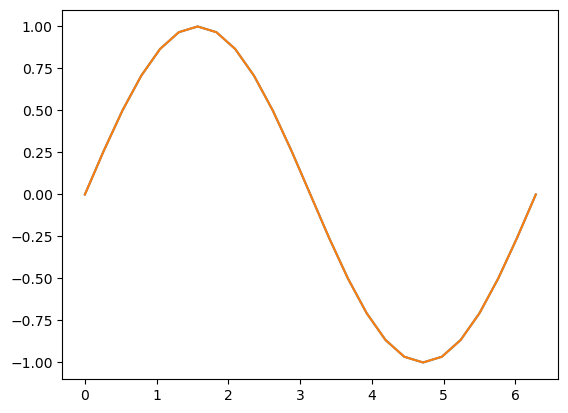

In [4]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())
plt.show()

In [5]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


In [6]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


In [7]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


In [8]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\b:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x7f5cf9034370>, 0), (None, 0))
((<SinBackward0 object at 0x7f5c397aa470>, 0), (None, 0))
((<AccumulateGrad object at 0x7f5cf905b100>, 0),)
()

c:
:

a:
None


tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


/home/nzr170/miniconda3/envs/pytorch/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /opt/conda/conda-bld/pytorch_1724789560443/work/c10/cuda/CUDAFunctions.cpp:108.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


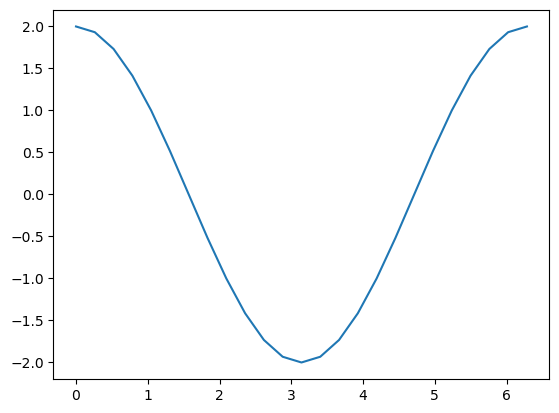

In [9]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())
plt.show()

## Autograd in Training

In [17]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):
    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(DIM_IN, HIDDEN_SIZE)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(HIDDEN_SIZE, DIM_OUT)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

In [18]:
print(model.layer2.weight[0][0:10]) 
print(model.layer2.weight.grad)

tensor([ 0.0466,  0.0769,  0.0335, -0.0910,  0.0317, -0.0558, -0.0551, -0.0951,
         0.0760,  0.0100], grad_fn=<SliceBackward0>)
None


In [19]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
prediction = model(some_input)
loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(159.4538, grad_fn=<SumBackward0>)


In [20]:
loss.backward()   # computes gradients
print(model.layer2.weight[0][0:10]) 
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0466,  0.0769,  0.0335, -0.0910,  0.0317, -0.0558, -0.0551, -0.0951,
         0.0760,  0.0100], grad_fn=<SliceBackward0>)
tensor([-1.2499,  4.7428,  7.6997,  6.0636, -0.4514, -2.8773, -0.5526,  0.1959,
         7.8025,  2.2506])


In [21]:
optimizer.step()   # updates model weights
print(model.layer2.weight[0][0:10]) 
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0478,  0.0722,  0.0258, -0.0971,  0.0321, -0.0529, -0.0545, -0.0953,
         0.0682,  0.0078], grad_fn=<SliceBackward0>)
tensor([-1.2499,  4.7428,  7.6997,  6.0636, -0.4514, -2.8773, -0.5526,  0.1959,
         7.8025,  2.2506])


In [22]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0,5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()    
    
print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad()

print(model.layer2.weight.grad)

tensor([-1.2499,  4.7428,  7.6997,  6.0636, -0.4514, -2.8773, -0.5526,  0.1959,
         7.8025,  2.2506])
tensor([-9.0129,  8.4686,  4.3570, 43.8096, -9.2373, -5.6573,  1.4211, 15.7447,
        19.4109, 10.7928])
None


In [23]:
a = torch.ones(2,3, requires_grad=True)
print(a)

b1 = 2*a
print(b1)

a.requires_grad = False
b2 = 2*a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [24]:
a = torch.ones(2,3, requires_grad=True) * 2
b = torch.ones(2,3, requires_grad=True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b
print(c2)

c3 = a * b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


In [25]:
def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y

a = torch.ones(2,3, requires_grad=True) * 2
b = torch.ones(2,3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [26]:
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

tensor([0.1898, 0.4807, 0.1823, 0.6733, 0.8429], requires_grad=True)
tensor([0.1898, 0.4807, 0.1823, 0.6733, 0.8429])


In [27]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
torch.sin_(a)

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

## Autograd Profiler

In [28]:
x = torch.randn(2,3, requires_grad=True)
y = torch.rand(2,3, requires_grad=True)
z = torch.ones(2,3, requires_grad=True)

with torch.autograd.profiler.profile() as prf:
    for _ in range(1000):
        z = (z / x) * y

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::div        61.87%       5.714ms        61.87%       5.714ms       5.714us          1000  
    aten::mul        38.13%       3.521ms        38.13%       3.521ms       3.521us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 9.235ms



## Advanced Topic: More Autograd Detail and the High-Level API

In [29]:
x = torch.randn(3, requires_grad=True)

y = x*2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-456.2134, 1403.6976, -762.8221], grad_fn=<MulBackward0>)


In [32]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)  # stand-in for gradients
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


## The High-Level API

In [33]:
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1))
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.3850]), tensor([0.4667]))


(tensor([[2.9392]]), tensor([[3.]]))

In [34]:
inputs = (torch.rand(3), torch.rand(3))
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.5831, 0.8296, 0.1118]), tensor([0.6410, 0.4503, 0.5460]))


(tensor([[3.5833, 0.0000, 0.0000],
         [0.0000, 4.5847, 0.0000],
         [0.0000, 0.0000, 2.2365]]),
 tensor([[3., 0., 0.],
         [0., 3., 0.],
         [0., 0., 3.]]))

In [35]:
def do_some_doubling(x):
    y = x*2
    while y.data.norm() < 1000:
        y = y*2
    return y

inputs = torch.randn(3)
my_grad = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_grad)

(tensor([1240.7230,  725.2032, -252.9827]),
 tensor([1.0240e+02, 1.0240e+03, 1.0240e-01]))